# <span style = "color: green" >Simple Linear Regression Project (Gold Price Prediction) </span>

***

Of all the precious metals, gold is the most popular as an investment. Investors generally buy gold as a way of diversifying risk, especially through the use of futures contracts and derivatives. The gold market is subject to speculation and volatility as are other markets. Compared to other precious metals used for investment, gold has been the most effective safe haven across a number of countries.<br><br>
The Dataset contain gold prices (in USD) from 2001 to 2019.
Our goal is to predict where the gold prices will be in the coming years

#### Import the necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Read 'gold_price_usd.csv' & store it in a variable

In [3]:
df=pd.read_csv('gold_price_usd.csv')

#### View the first 5 rows

In [4]:
df.head()

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


#### Check the information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### Find the columns

In [6]:
df.columns

Index(['Date', 'USD (AM)'], dtype='object')

#### Rename USD (AM) to Price

In [7]:
df['Price']=df['USD (AM)']
df.drop(columns=['USD (AM)'],inplace=True)


In [8]:
df['Year']=df['Date'].apply(lambda x:x.split('-')[0])
df['Month']=df['Date'].apply(lambda x:x.split('-')[1][1])

In [9]:
df.head()

,Date,Price,Year,Month
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


#### Check if there are any missing values in the dataset

In [10]:
df.isna().sum()

Date     0
Price    0
Year     0
Month    0
dtype: int64

#### Gather the basic statistical information about the dataset

In [11]:
df.describe()

,Price
count,4718.000000
mean,959.990812
std,449.456217
min,256.700000
25%,449.112500
50%,1113.125000
75%,1293.750000
max,1896.500000


#### Convert Date column from object to datetime format

In [12]:
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4718 non-null   datetime64[ns]
 1   Price   4718 non-null   float64       
 2   Year    4718 non-null   object        
 3   Month   4718 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 147.6+ KB


#### Create a new column with Year

In [14]:
df['Year']=df['Date'].dt.year

In [15]:
df.head()

,Date,Price,Year,Month
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


#### Create a new column with Months

In [16]:
df['Month']=df['Date'].dt.month
df.head()

,Date,Price,Year,Month
0,2001-01-02,272.80,2001,1
1,2001-01-03,269.00,2001,1
2,2001-01-04,268.75,2001,1
3,2001-01-05,268.00,2001,1
4,2001-01-08,268.60,2001,1


#### See all the years and Months in our dataset

In [17]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [18]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## <span style = "color: orange" >Visualization</span>

### Create a regression plot with x-axis as years and y-axis as Price

<Axes: xlabel='Year', ylabel='Price'>

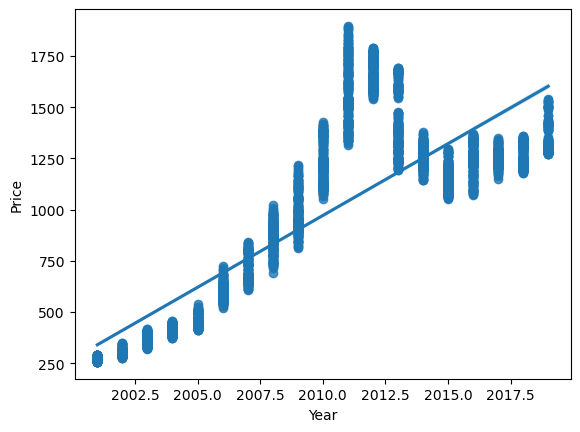

In [19]:
sns.regplot(x='Year',y='Price',data=df)

### Plot a histplot to find the variation in price

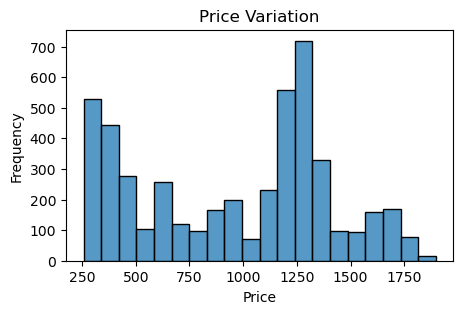

In [20]:
plt.figure(figsize=(5,3))
sns.histplot(df['Price'],bins=20)
plt.title('Price Variation')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Assign year and price in x and y variables

In [21]:
X = df[['Year']]
y = df['Price']

### Split the data into traning and testin set

We will train our model on the training set and then use the test set to evaluate the model

In [22]:
# import train_test split
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=100)

## Train Data

In [24]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

### Create Linear Regression Model

In [25]:
model=LinearRegression()

### Train the  model

In [26]:
model.fit(X_train,y_train)

LinearRegression()

### Check the score of our model

In [27]:
model.score(X_train,y_train)

0.7048691960222999

### Check the coefficient and Intercept

In [28]:
#print the intercept
model.intercept_

-140074.3237477936

In [29]:
#print the coefficent
model.coef_

array([70.17366927])

### Make Prediction with Test data

In [30]:
# Also store the predicted values in a variable
prediction=model.predict(X_test)
prediction

array([ 553.70946788,  413.36212934, 1185.27249131, ..., 1115.09882204,
        343.18846007, 1536.14083765])

### Create a new dataframe with actual and predicted values with year(X_test) as index

In [37]:
new_df=pd.DataFrame({'y_test':y_test,'prediction':prediction})
new_df.set_index(X_test['Year']).head()


,y_test,prediction
Year,,
2004,425.50,553.709468
2002,307.80,413.362129
2013,1335.75,1185.272491
2007,687.25,764.230476
2009,924.75,904.577814


### Check the mean absolute error, mean square error

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
# Mean absolute error
mean_absolute_error(y_test,prediction)

186.24273893873823

In [42]:
# Mean squared error
mean_squared_error(y_test,prediction)

58032.97376893202

### Predict the prices for the following years
   * 2025, 2026, 2027, 2028, 2030

In [43]:
df1=pd.DataFrame({'Year':[2025, 2026, 2027, 2028, 2030]})

In [44]:
predict=model.predict(df1)

In [45]:
predict

array([2027.35652254, 2097.53019181, 2167.70386108, 2237.87753035,
       2378.22486888])

In [47]:
prediction=pd.DataFrame({'price':predict},index=[2025, 2026, 2027, 2028, 2030])
prediction

,price
2025,2027.356523
2026,2097.530192
2027,2167.703861
2028,2237.877530
2030,2378.224869


,Price
2025,2027.356523
2026,2097.530192
2027,2167.703861
2028,2237.877530
2030,2378.224869


***

# <span style = "color:green;font-size:40px"> Great Job!</span>